-Load the dataset. What are the features?

-Create a DataFrame of given wine dataset. Standardize the features.

-Split the dataset into training and test sets (30%).

-Use the linalg.eig function from NumPy to obtain the eigenpairs of the Wine covariance matrix. Print the eigenvalues.

-Compute and plot the individual explained variance and the cumulative explained variance (range from 1 to 14). Using the NumPy cumsum function, calculate the cumulative sum of explained variances, which you will then plot via Matplotlib's step function. Explain the outcomes.

-Sort the eigenpairs by decreasing order of the eigenvalues. Make a list of (eigenvalue, eigenvector) tuples. Sort the (eigenvalue, eigenvector) tuples from high to low. Print the projection matrix W.

-Using the projection matrix, transform a sample x onto the PCA subspace (the principal components 1 and 2). Transform the entire 124 x 13-dimensional training dataset onto the two principal components by calculating the matrix dot product.

-Visualize the transformed Wine training set into a two-dimensional scatterplot.

-Method number 2. Import ListedColormap. Set up marker generator and color map. -----Plot the decision surface and plot the class samples.

-Import LogisticRegression and PCA. Visualize the decision regions (hint: X_train_pca, y_train, classifier=lr).


In [148]:
#-Load the dataset. What are the features?
#-Create a DataFrame of given wine dataset. Standardize the features.
#-Split the dataset into training and test sets (30%).
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


colNames = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
            'Total Phenols', 'Falvanoids', 'Nonflavanoid Phenols', 'Proanthocyanins',
            'Color Intensity', 'Hue', 'OD280/OD315 of Diluted Wines', 'Proline']

data = pd.read_csv('wine.data', names = colNames, sep = ',')

x = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 42)

sc = preprocessing.StandardScaler()

x_train_s = sc.fit_transform(x_train)

x_test_s = sc.transform(x_test)

From the wine.names file, the features (starting at the second column, the first column seems to denote some class specified in the names file):
1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash  

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10) Color intensity

11) Hue

12) OD280/OD315 of diluted wines

13) Proline    

In [129]:
#-Use the linalg.eig function from NumPy to obtain the eigenpairs of the Wine covariance matrix. Print the eigenvalues.
from numpy import linalg as LA

covariance = np.cov(x_train_s.T)
val, vec = LA.eig(covariance)

val

array([4.74376552, 2.45913372, 1.5276711 , 0.99327678, 0.92313257,
       0.59663887, 0.46974164, 0.09935613, 0.17349645, 0.34681782,
       0.23096439, 0.25665489, 0.28504118])

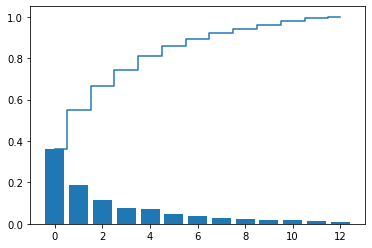

In [132]:
#-Compute and plot the individual explained variance and the cumulative explained variance (range from 1 to 14).
#Using the NumPy cumsum function, calculate the cumulative sum of explained variances,
#which you will then plot via Matplotlib's step function. Explain the outcomes.
import matplotlib.pyplot as plt

total = sum(val)

explained_variance = [(i / total) for i in sorted(val, reverse=True)]
e_v_cum = np.cumsum(explained_variance)

plt.bar(range(0, len(explained_variance)),explained_variance)
plt.step(range(0, len(e_v_cum)), e_v_cum, where='mid')

Each bar represents the proportion of variance explained by its respective factor, the step function shows the total level of variance explained by all factors up to each individual step (in this one, it looks like the first is about .37, and the first two combined are ~.55)

In [143]:
#-Sort the eigenpairs by decreasing order of the eigenvalues. Make a list of (eigenvalue, eigenvector) tuples.
#Sort the (eigenvalue, eigenvector) tuples from high to low. Print the projection matrix W.

    
eigenpairs = [(np.abs(val[i]), vec[:, i])
     for i in range(len(val))]
eigenpairs.sort(reverse=True)

W = np.hstack((eigenpairs[0][1][:, np.newaxis], eigenpairs[1][1][:, np.newaxis]))
print(W)

[[-0.13443023 -0.49571937]
 [ 0.25680248 -0.21988534]
 [ 0.0113463  -0.25579499]
 [ 0.23405337  0.09630359]
 [-0.15840049 -0.26616487]
 [-0.39194918 -0.06381624]
 [-0.41607649 -0.00971648]
 [ 0.27871336 -0.0275335 ]
 [-0.33129255 -0.0073265 ]
 [ 0.11383282 -0.54829944]
 [-0.29726413  0.27616688]
 [-0.38054255  0.15580423]
 [-0.27507157 -0.39269514]]


In [150]:
#-Using the projection matrix, transform a sample x onto the PCA subspace (the principal components 1 and 2).
# Transform the entire 124 x 13-dimensional training dataset
# onto the two principal components by calculating the matrix dot product.

print(x_train_s[0].dot(W))

x_train_pca = x_train_s.dot(W)
x_train_s

[ 3.00694856 -0.44098187]


array([[ 0.62844732,  1.08120605, -0.65212742, ..., -0.64137827,
        -1.07090115, -0.51821917],
       [-0.54088231, -0.61299439, -1.42753372, ...,  0.34652993,
         1.33076844, -0.21506322],
       [-0.75565714, -1.28703113, -1.53830605, ...,  0.43243499,
        -0.39843366,  0.04196031],
       ...,
       [ 1.69038953, -0.48547393,  0.04943066, ...,  1.03377042,
         0.54851034,  2.66821356],
       [-0.32610748, -0.79516648, -0.39365865, ...,  0.00290969,
        -0.74152932, -0.79830892],
       [-0.74372521,  0.04282513,  0.34482354, ..., -0.6843308 ,
         1.07001574, -0.98613381]])

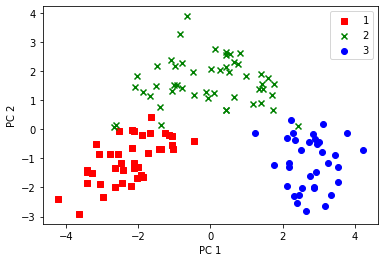

In [156]:
#-Visualize the transformed Wine training set into a two-dimensional scatterplot.

for l, c, m in zip(np.unique(y_train), ['r', 'g', 'b'], ['s', 'x', 'o']):
    plt.scatter(x_train_pca[y_train == l, 0], x_train_pca[y_train == l, 1], c = c, label = l, marker = m)

    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

C:\Users\Peter\AppData\Local\Temp/ipykernel_24332/1415915513.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


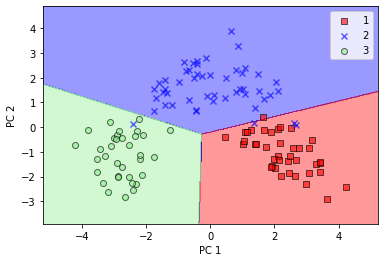

In [163]:
#-Method number 2. Import ListedColormap. Set up marker generator and color map. 
#-----Plot the decision surface and plot the class samples.
#-Import LogisticRegression and PCA. Visualize the decision regions (hint: X_train_pca, y_train, classifier=lr).

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.6,
            color=cmap(idx),
            edgecolor='black',
            marker=markers[idx],
            label=cl)
        
pca = PCA(n_components = 2)
logReg = LogisticRegression(multi_class = 'ovr', random_state = 42, solver = 'lbfgs')

x_train_pca = pca.fit_transform(x_train_s)
x_test_pca = pca.transform(x_test_s)

logReg.fit(x_train_pca, y_train)
plot_decision_regions(x_train_pca, y_train, classifier = logReg)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()